In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
n = 100
actual = np.array([22, 53, 25])
# prob_m = (actual * [2, 1, 0] / (n * 2)).sum()
prob_m = 0.5
prob_i = np.array([prob_m * prob_m, 2 * prob_m * (1 - prob_m), (1 - prob_m) * (1 - prob_m)])
expect = prob_i * n
# chi2_c = ((actual - expect) ** 2 / expect).sum()
sts.chisquare(actual, expect)

Power_divergenceResult(statistic=0.54, pvalue=0.7633794943368533)

In [4]:
n = 100
actual = np.array([22, 33, 45])
prob_m = (actual * [2, 1, 0] / (n * 2)).sum()
prob_i = np.array([prob_m * prob_m, 2 * prob_m * (1 - prob_m), (1 - prob_m) * (1 - prob_m)])
expect = prob_i * n
# chi2_c = ((actual - expect) ** 2 / expect).sum()
# в сложной теореме уменьшаем количество степеней свободы. в даном случае остается только prob_m как независимая величина
# потому оставляем ddof = 1 (dof = k - 1 - ddof)
sts.chisquare(actual, expect, ddof=1)

Power_divergenceResult(statistic=9.189136689774069, pvalue=0.0024345568963482717)

In [5]:
# no expect -- tests for discrete uniform dist
sts.chisquare(actual, ddof=1)

Power_divergenceResult(statistic=7.9399999999999995, pvalue=0.004835383460771927)

In [6]:
1 - sts.chi2.cdf(9.189136689774069, 2)

0.010106582397520603

In [7]:
observed = sts.norm.rvs(0, 1, 100)
observed

array([ 1.68475159e+00, -1.08243213e-01, -9.70016050e-01,  1.32427652e+00,
        2.18787812e+00, -3.94110177e-01,  8.39838535e-01,  2.16623759e+00,
       -1.09762386e+00,  4.25611984e-01,  7.07308412e-01,  4.22511808e-01,
       -2.00900041e+00, -4.68687537e-01,  9.67863039e-01, -6.74636706e-01,
        2.13552282e+00, -2.49988293e-01,  2.02206466e+00,  1.67546546e+00,
        2.19848463e-01,  1.01072902e+00, -8.79172963e-01, -1.04014391e+00,
       -1.89340065e-01,  1.43080044e+00,  5.98957181e-01, -1.04145009e+00,
        1.26756385e-01,  1.76606309e+00,  1.47404951e+00,  5.91672184e-01,
        2.55627090e-01, -5.47298538e-01,  4.96733053e-01,  1.64418406e+00,
        4.48034454e-02, -8.88066798e-01, -1.68806081e+00, -1.49846668e+00,
        1.88474540e+00, -3.27058484e-01, -8.69953043e-01, -7.85770739e-01,
        2.74836808e-01,  6.68929769e-01, -2.81678372e-01,  3.40825510e-03,
       -7.69490828e-01,  9.03263288e-01, -7.45043451e-01,  4.71549852e-01,
        9.53460969e-01, -

C:\dev\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


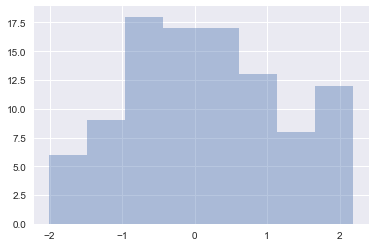

In [8]:
bins = np.histogram(observed, bins='auto')
sns.distplot(observed, bins=bins[1], kde=False)

In [9]:
bins

(array([ 6,  9, 18, 17, 17, 13,  8, 12], dtype=int64),
 array([-2.00900041, -1.4843906 , -0.95978078, -0.43517096,  0.08943885,
         0.61404867,  1.13865849,  1.6632683 ,  2.18787812]))

In [10]:
prob_bins = list(bins[1])
prob_bins[0] = -np.inf
prob_bins[-1] = np.inf
prob_bins

[-inf,
 -1.4843905957438903,
 -0.9597807789676422,
 -0.4351709621913942,
 0.0894388545848539,
 0.6140486713611022,
 1.13865848813735,
 1.663268304913598,
 inf]

In [11]:
# для сложных гипотез заменить (0, 1) параметрами получеными из выборки (не _.std())
func = sts.norm(0, 1).cdf
prob_1 = func(prob_bins[:-1])
prob_2 = func(prob_bins[1:])
prob = prob_2 - prob_1
prob

array([0.06885266, 0.09973011, 0.16313639, 0.20391426, 0.19477499,
       0.14216877, 0.07929344, 0.04812937])

In [12]:
expected = prob * observed.size
expected

array([ 6.88526641,  9.97301149, 16.31363901, 20.39142581, 19.47749903,
       14.21687709,  7.92934415,  4.81293701])

In [13]:
# соответственно здесь уменьшаем количество степеней свободы на 2 (ddof=2)
assert bins[0].size == expected.size
sts.chisquare(bins[0], expected)

Power_divergenceResult(statistic=12.099341843097354, pvalue=0.09733892392492319)